In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

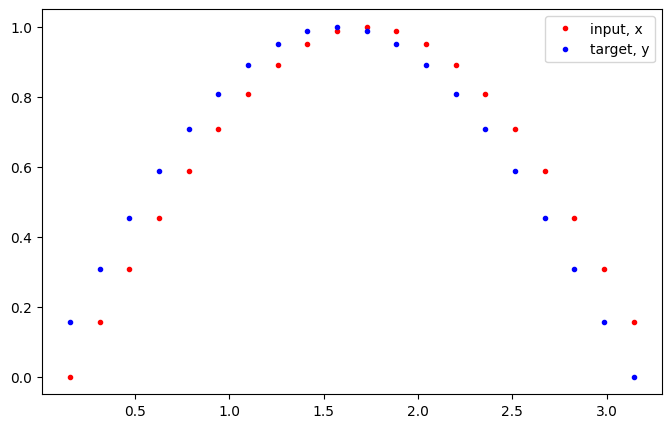

In [2]:
plt.figure(figsize=(8,5))

# how many time steps/data pts are in one batch of data
seq_length = 20

# generate evenly spaced data pts
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1)) # size becomes (seq_length+1, 1), adds an input_size dimension

x = data[:-1] # all but the last piece of data
y = data[1:] # all but the first

# display the data
plt.plot(time_steps[1:], x, 'r.', label='input, x') # x
plt.plot(time_steps[1:], y, 'b.', label='target, y') # y

plt.legend(loc='best')
plt.show()

In [3]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden

In [4]:
# test that dimensions are as expected
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())

# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 20, 1])
Output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [5]:
input_size=1
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [6]:
# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [7]:
# train the RNN
def train(rnn, n_steps, print_every):

    # initialize the hidden state
    hidden = None

    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()

    return rnn

Loss:  0.6352793574333191


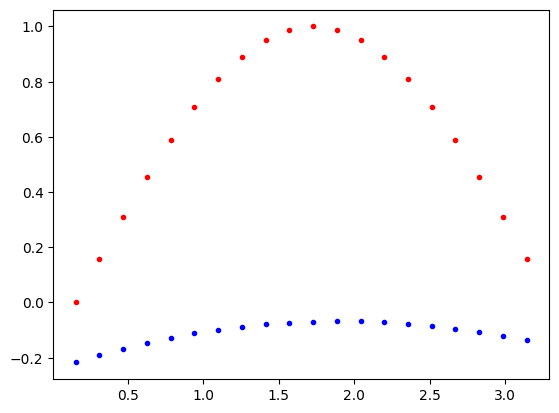

Loss:  0.10786130279302597


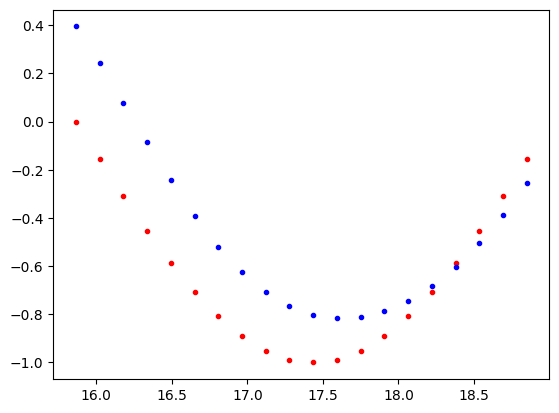

Loss:  0.0630284771323204


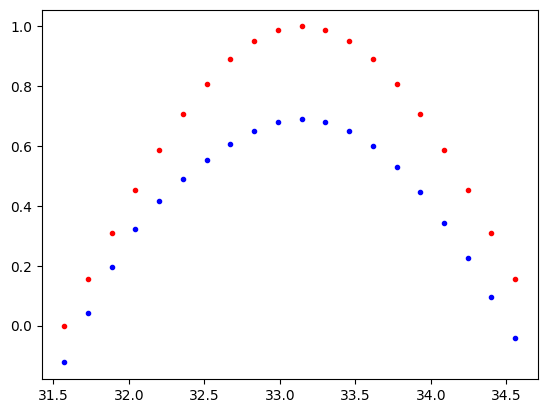

Loss:  0.007602553814649582


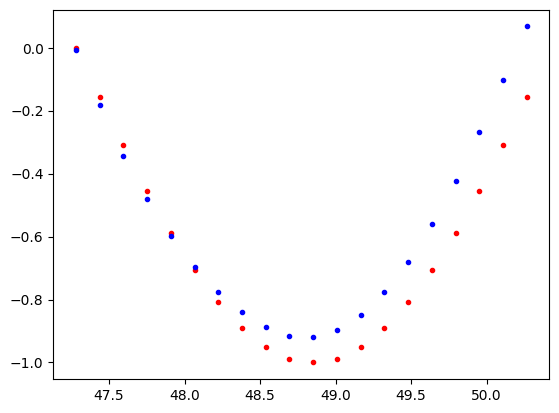

Loss:  0.007127845194190741


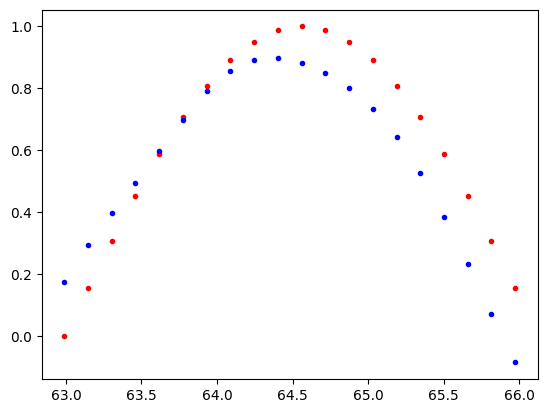

Loss:  0.00617566192522645


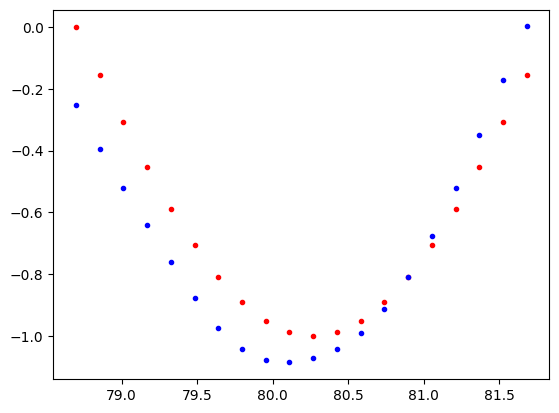

Loss:  0.00044401100603863597


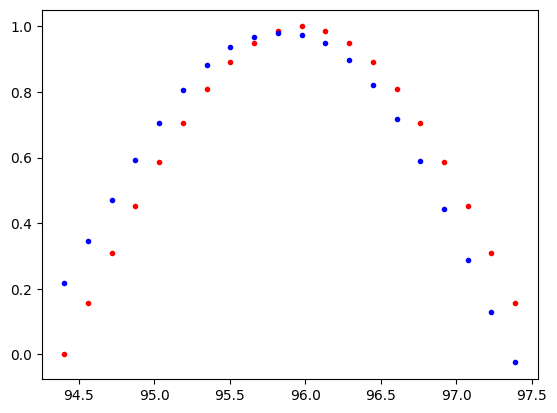

Loss:  0.00032443663803860545


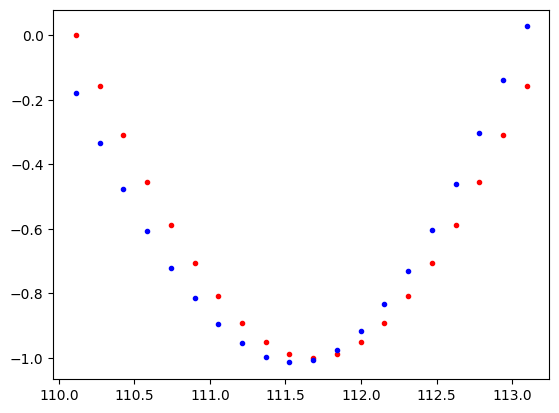

Loss:  0.0008785589598119259


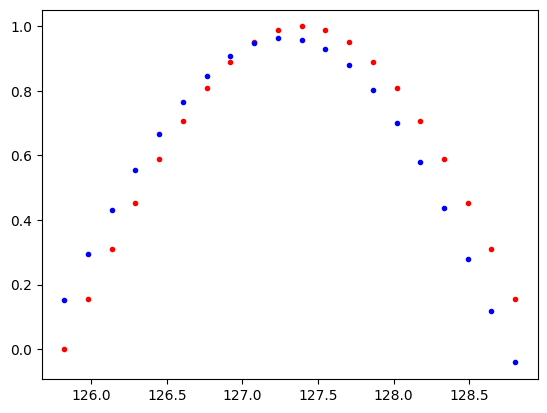

Loss:  0.00014859263319522142


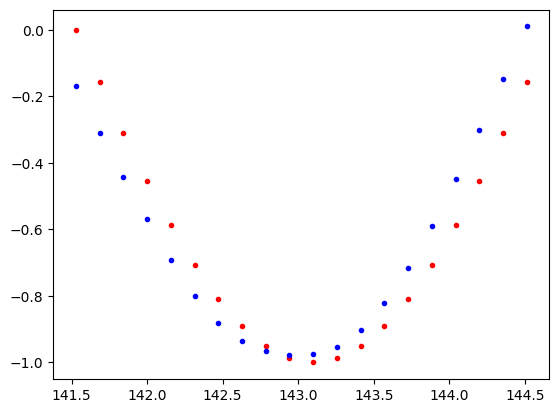

Loss:  0.0002152623637812212


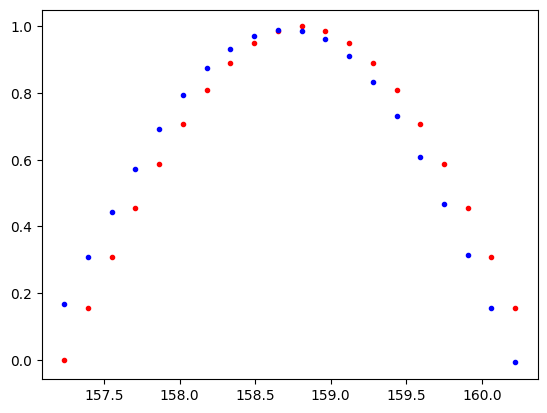

Loss:  0.0001244530430994928


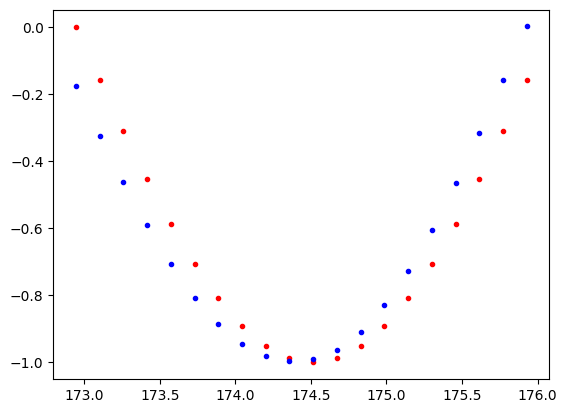

Loss:  0.00019128358690068126


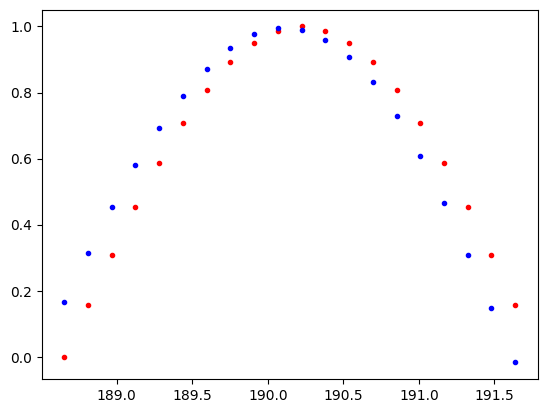

Loss:  0.00010157077485928312


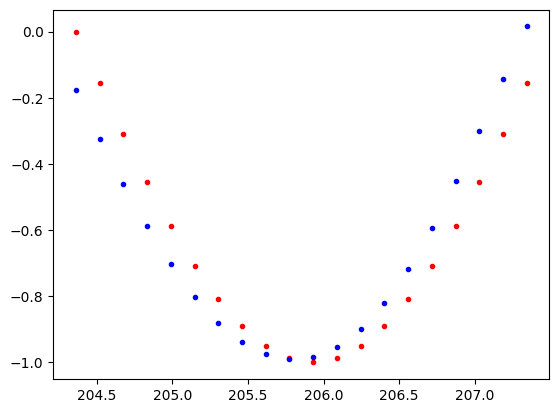

Loss:  0.0001865823578555137


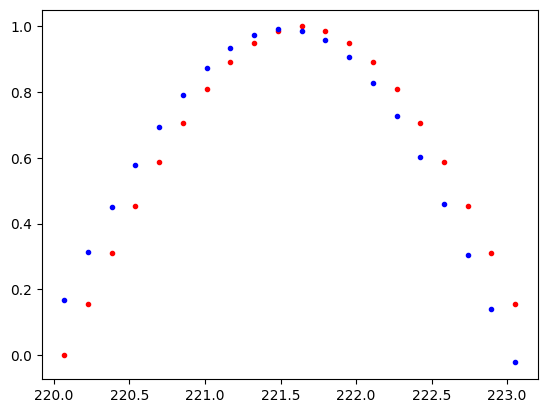

In [8]:
# train the rnn and monitor results
n_steps = 75
print_every = 5

trained_rnn = train(rnn, n_steps, print_every)

In [ ]:
# Задача
# 1. Сгенерируйте набор данных для предсказания временных последовательностей. Выполните тренировку RNN
# 2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки pytorch.
# https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

# 3. решите задачу набора данных лекции 7.

In [9]:
# Задача 1

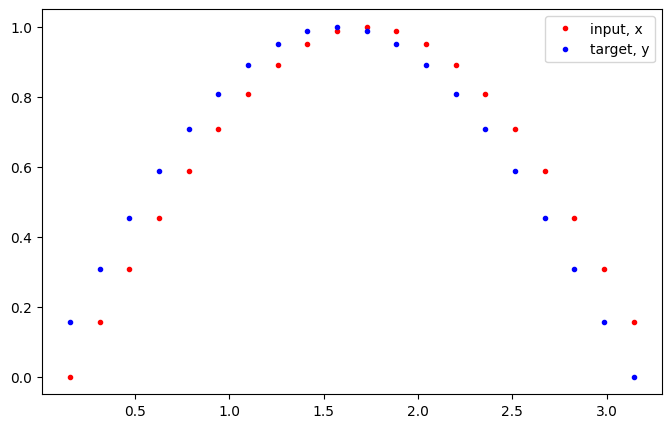

Loss:  0.5486965179443359


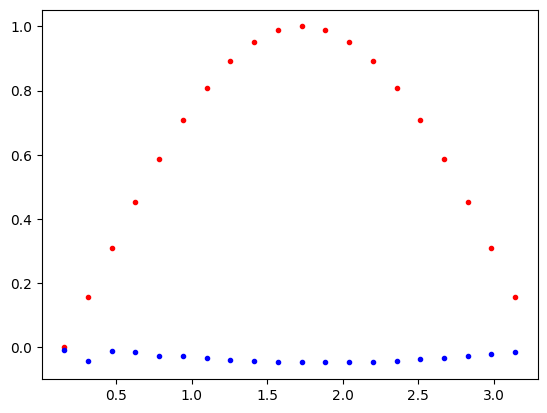

Loss:  0.23847050964832306


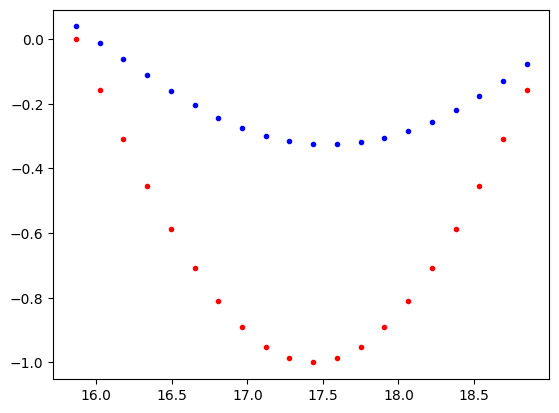

Loss:  0.11889644712209702


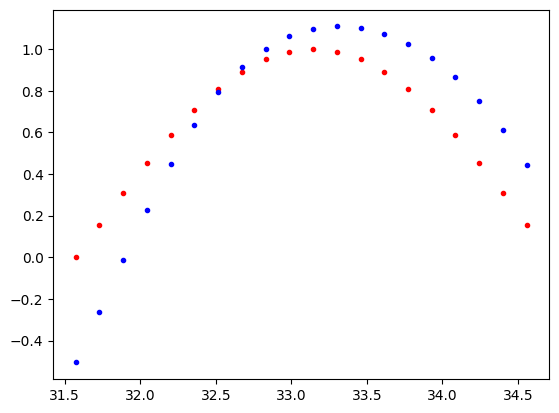

Loss:  0.06663472205400467


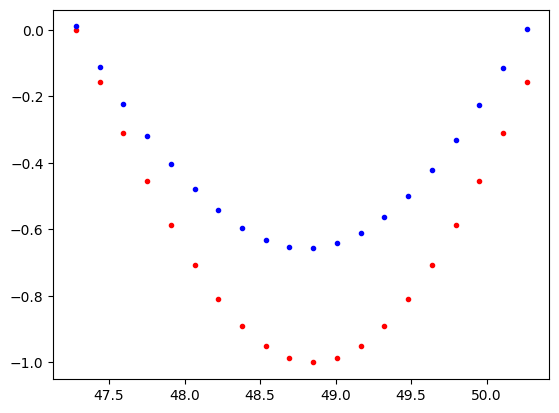

Loss:  0.007838246412575245


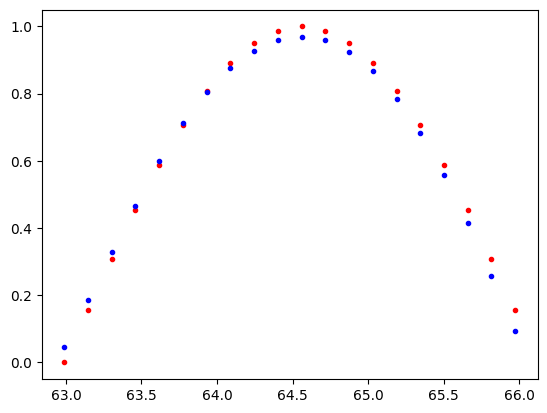

Loss:  0.006942944135516882


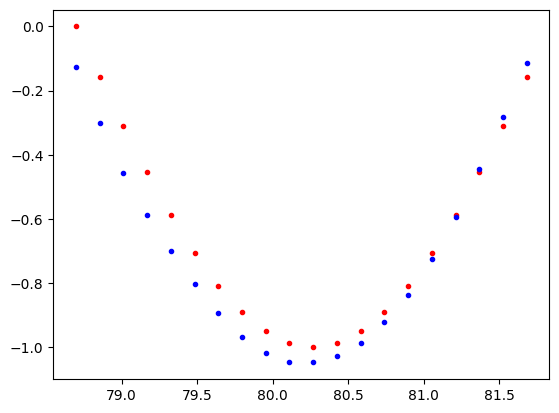

Loss:  0.004878896288573742


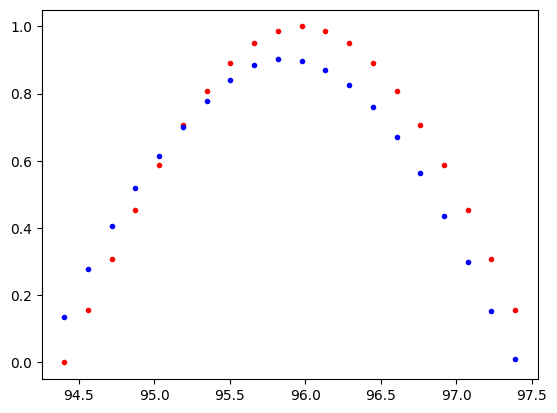

Loss:  0.0007258533732965589


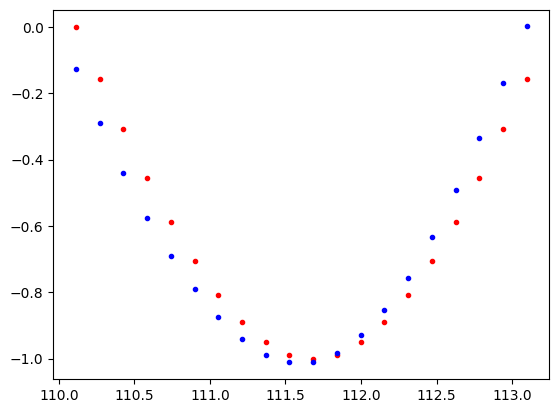

Loss:  0.0015946138883009553


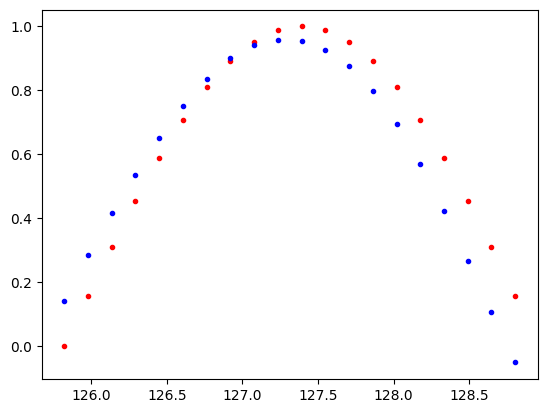

Loss:  0.0003258580109104514


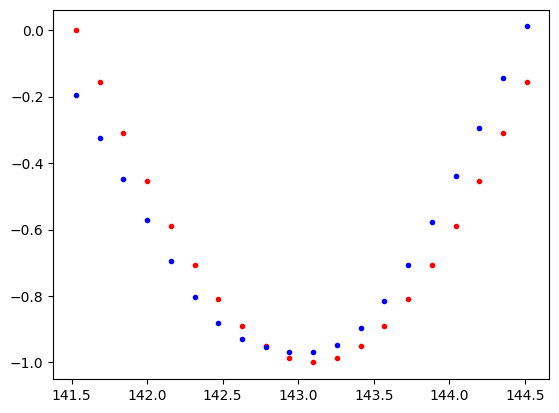

Loss:  0.001151719712652266


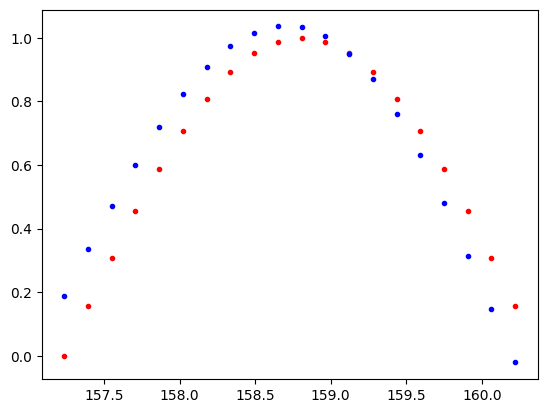

Loss:  0.0003015429829247296


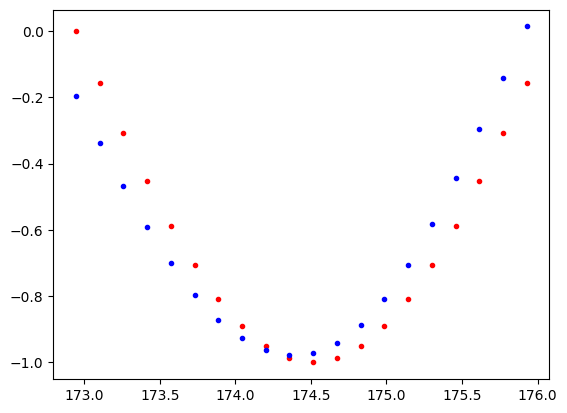

Loss:  0.0005740996566601098


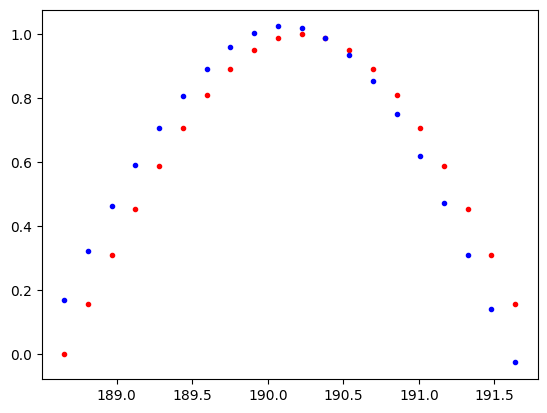

Loss:  0.0002691661939024925


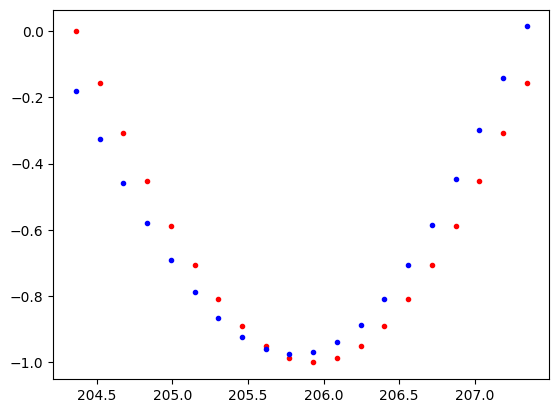

Loss:  0.0002641275932546705


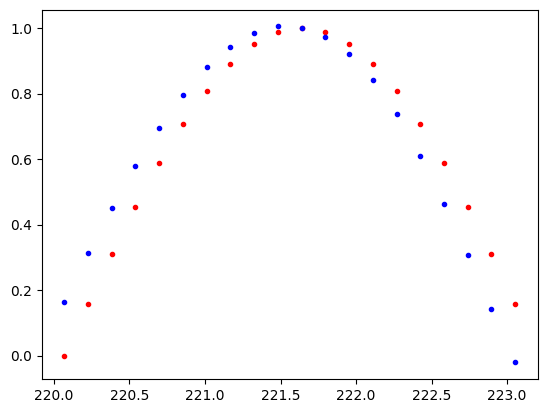

In [12]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Генерация данных
plt.figure(figsize=(8, 5))
seq_length = 20  # длина временной последовательности
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1))  # добавляем измерение input_size

x = data[:-1]  # входные данные
y = data[1:]  # целевые значения

# Визуализация
plt.plot(time_steps[1:], x, 'r.', label='input, x')  # входные данные
plt.plot(time_steps[1:], y, 'b.', label='target, y')  # целевые значения
plt.legend(loc='best')
plt.show()

# Определение RNN
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)  # выравниваем выход RNN
        output = self.fc(r_out)  # полностью связанный слой
        return output, hidden

# Создание модели
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1
rnn = RNN(input_size, output_size, hidden_dim, n_layers)

# Функция потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# Функция обучения
def train(rnn, n_steps, print_every):
    hidden = None  # начальное скрытое состояние
    for batch_i, step in enumerate(range(n_steps)):
        # Генерация данных на каждом шаге
        time_steps = np.linspace(step * np.pi, (step + 1) * np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1))
        x = data[:-1]
        y = data[1:]

        # Преобразование в тензоры
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)

        # Прогон через RNN
        prediction, hidden = rnn(x_tensor, hidden)
        hidden = hidden.data  # отсоединяем градиенты прошлого шага

        # Вычисление ошибки
        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Вывод графиков и ошибки
        if batch_i % print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.')  # входные данные
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')  # предсказания
            plt.show()

    return rnn

# Обучение модели
n_steps = 75
print_every = 5
trained_rnn = train(rnn, n_steps, print_every)


In [13]:
#Задача 2

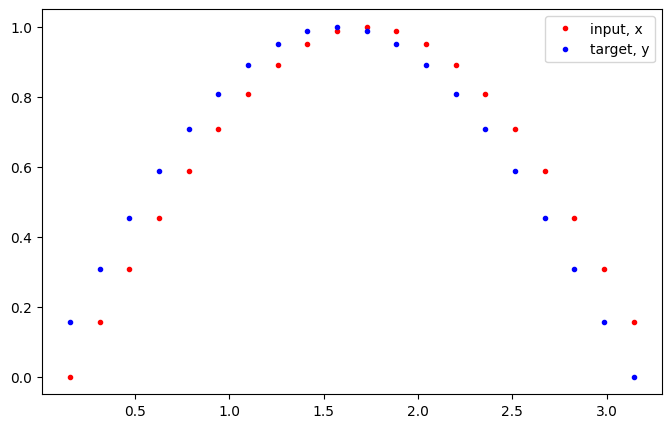

Loss:  0.6070078611373901


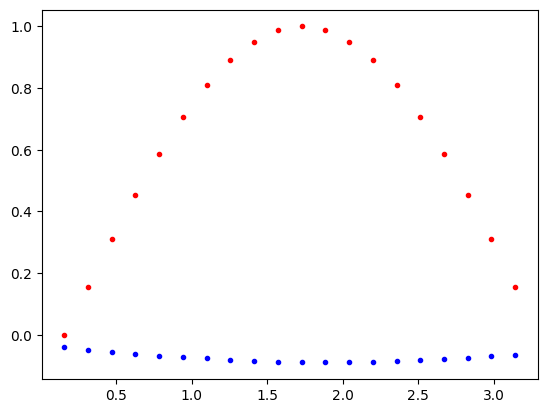

Loss:  0.43530330061912537


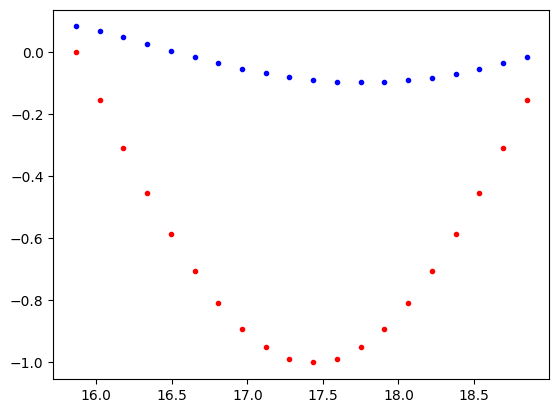

Loss:  0.19540290534496307


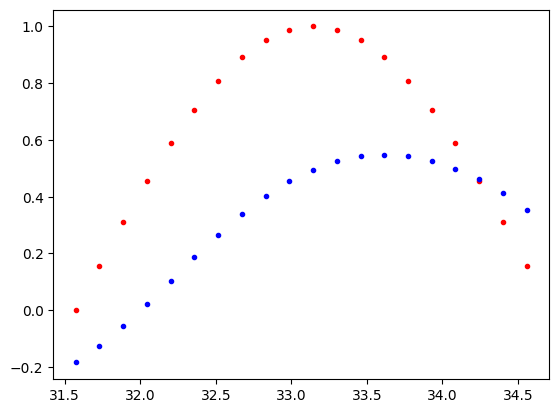

Loss:  0.1321803629398346


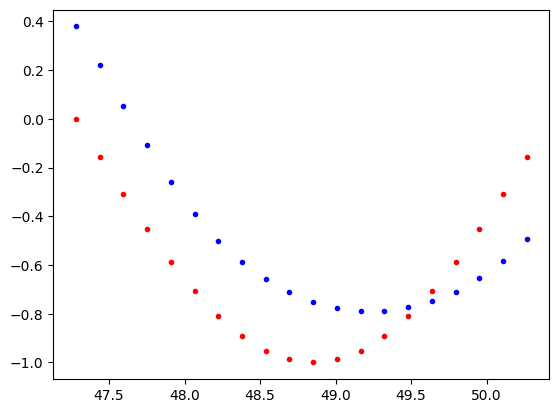

Loss:  0.06291597336530685


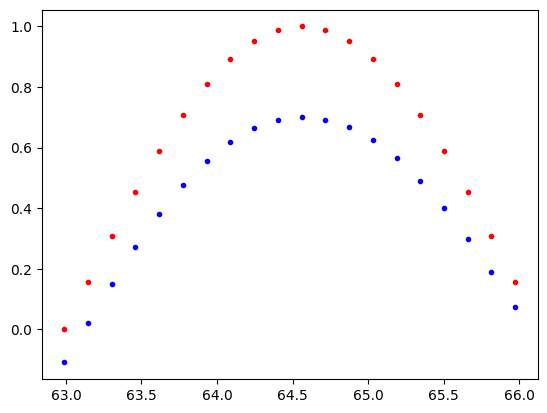

Loss:  0.014552250504493713


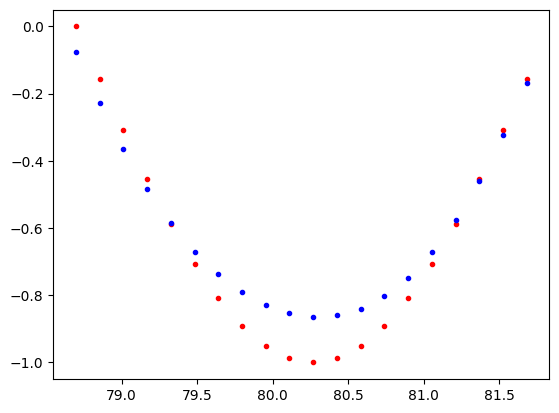

Loss:  0.013197556138038635


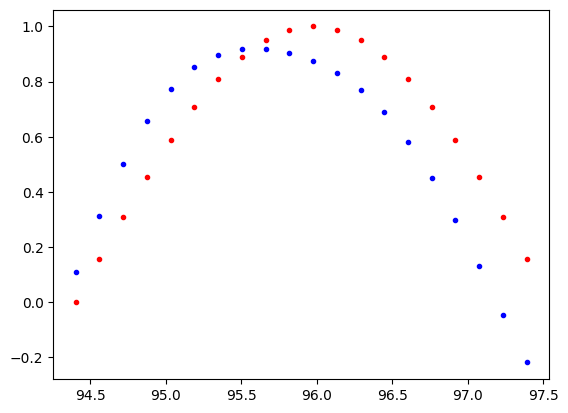

Loss:  0.005228214897215366


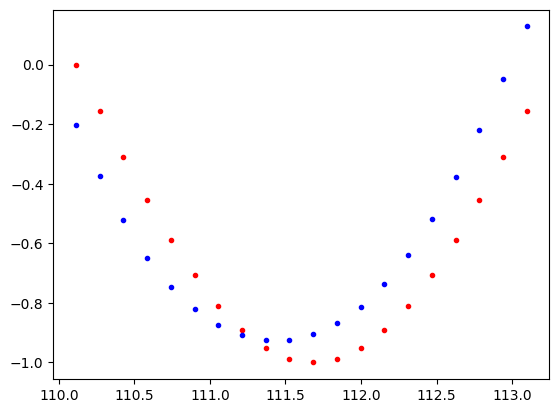

Loss:  0.003071053419262171


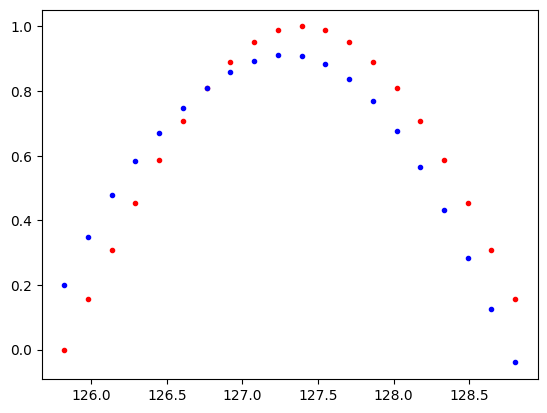

Loss:  0.0019247547024860978


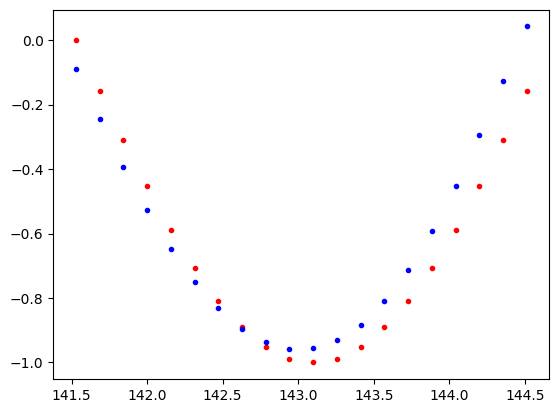

Loss:  0.001978248357772827


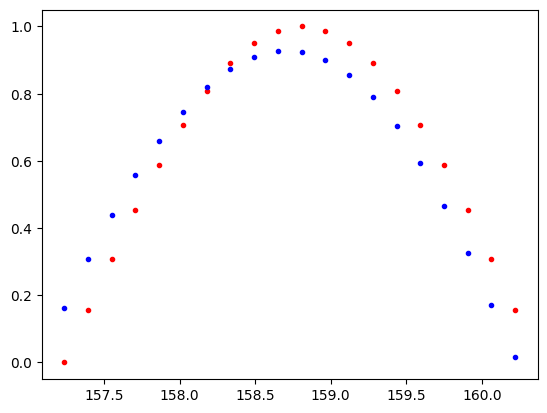

Loss:  0.0003252534079365432


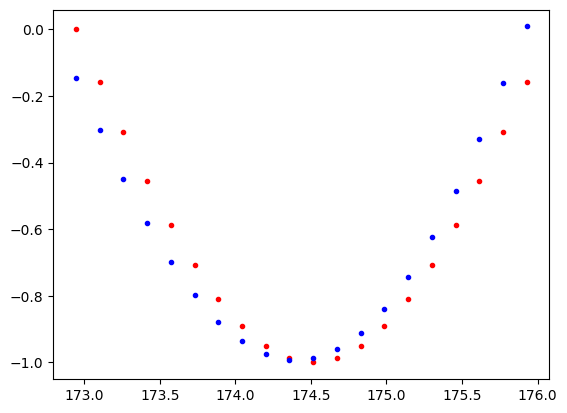

Loss:  0.00032690484658814967


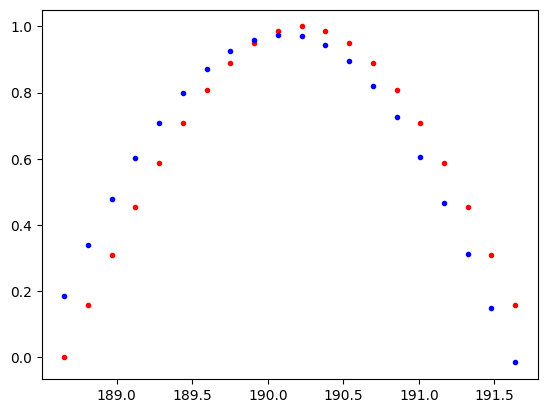

Loss:  0.0005320362979546189


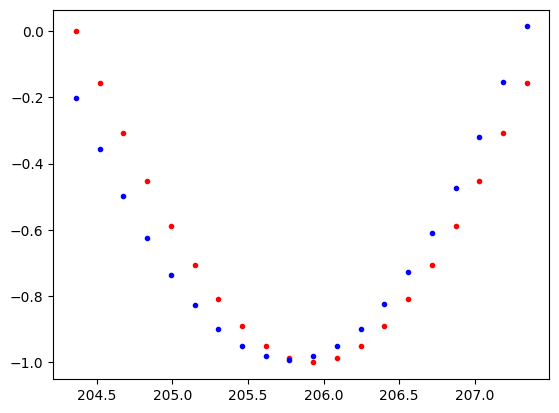

Loss:  0.0003417663392610848


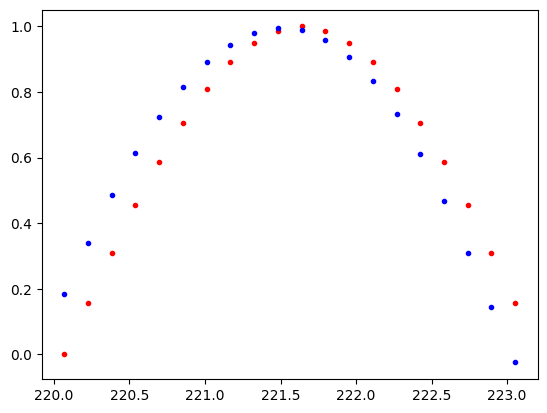

In [15]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Генерация данных
plt.figure(figsize=(8, 5))
seq_length = 20  # длина временной последовательности
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1))  # добавляем измерение input_size

x = data[:-1]  # входные данные
y = data[1:]  # целевые значения

# Визуализация
plt.plot(time_steps[1:], x, 'r.', label='input, x')  # входные данные
plt.plot(time_steps[1:], y, 'b.', label='target, y')  # целевые значения
plt.legend(loc='best')
plt.show()

# Определение LSTM
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim

        # LSTM слой
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
        # Полносвязный слой
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # LSTM возвращает выход и новое скрытое состояние
        r_out, hidden = self.lstm(x, hidden)
        # Изменяем форму выхода для полносвязного слоя
        r_out = r_out.view(-1, self.hidden_dim)
        # Предсказание через полносвязный слой
        output = self.fc(r_out)
        return output, hidden

# Создание модели
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1
lstm = LSTM(input_size, output_size, hidden_dim, n_layers)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

# Функция обучения
def train_lstm(model, n_steps, print_every):
    hidden = None  # начальное скрытое состояние
    for batch_i, step in enumerate(range(n_steps)):
        # Генерация данных на каждом шаге
        time_steps = np.linspace(step * np.pi, (step + 1) * np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1))
        x = data[:-1]
        y = data[1:]

        # Преобразование в тензоры
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)

        # Прогон через LSTM
        prediction, hidden = model(x_tensor, hidden)

        # Разрыв обратного распространения градиента
        hidden = tuple([h.data for h in hidden])

        # Вычисление ошибки
        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Вывод графиков и ошибки
        if batch_i % print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.')  # входные данные
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')  # предсказания
            plt.show()

    return model

# Обучение модели
n_steps = 75
print_every = 5
trained_lstm = train_lstm(lstm, n_steps, print_every)



In [16]:
#Задача 3

Epoch [10/100], Loss: 0.0275
Epoch [20/100], Loss: 0.0255
Epoch [30/100], Loss: 0.0220
Epoch [40/100], Loss: 0.0177
Epoch [50/100], Loss: 0.0111
Epoch [60/100], Loss: 0.0023
Epoch [70/100], Loss: 0.0018
Epoch [80/100], Loss: 0.0005
Epoch [90/100], Loss: 0.0006
Epoch [100/100], Loss: 0.0004
Test Loss: 0.0004


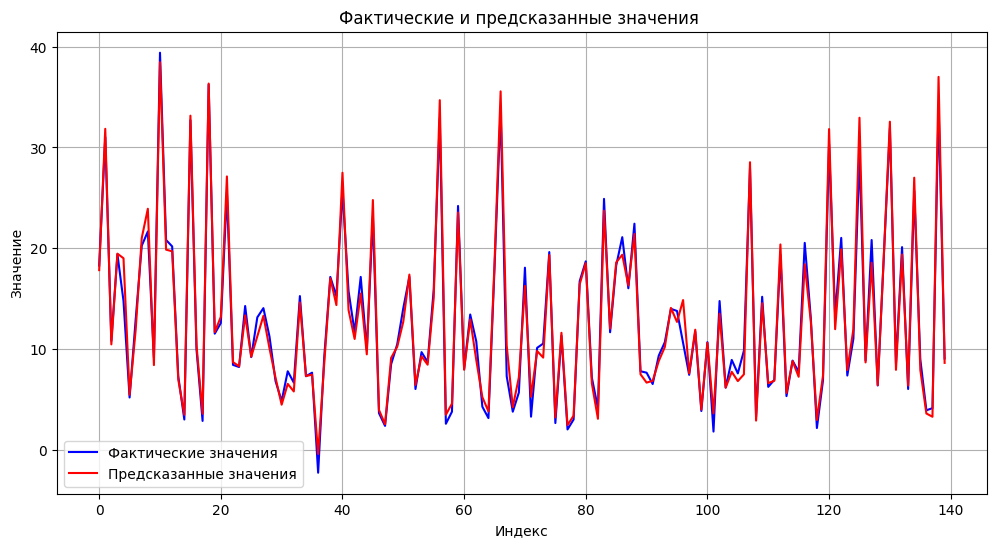

In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка и предварительная обработка данных
df = pd.read_csv('ETTm1.csv')
data = df['OT'].values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Функция для создания временных последовательностей
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Длина последовательности
X, y = create_sequences(data, seq_length)

# Преобразуем данные в тензоры
X = torch.FloatTensor(X).view(-1, seq_length, 1)
y = torch.FloatTensor(y).view(-1, 1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели LSTM
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=32, batch_first=True)  # LSTM слой
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_time_step = lstm_out[:, -1, :]
        out = self.fc(last_time_step)
        return out

# Инициализация модели, функции потерь и оптимизатора
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Оптимизатор Adam

# Обучение модели
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')  # Выводим ошибку каждые 10 эпох

# Оценка модели
model.eval()
with torch.no_grad():
    test_output = model(X_test)  # Предсказания на тестовых данных
    test_loss = criterion(test_output, y_test)  # Ошибка на тестовых данных
    print(f'Test Loss: {test_loss.item():.4f}')

# Преобразование предсказаний обратно к исходному масштабу
test_output_inverse = scaler.inverse_transform(test_output.numpy())
y_test_inverse = scaler.inverse_transform(y_test.numpy())

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[::100], label='Фактические значения', color='blue')  # Реальные значения
plt.plot(test_output_inverse[::100], label='Предсказанные значения', color='red')  # Предсказания
plt.title('Фактические и предсказанные значения ')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()
